In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import random

In [2]:
dataset_test = pd.read_csv('XYtest.dat', sep=" ", header=None)
dataset_train = pd.read_csv('XYtrain.dat', sep=" ", header=None)

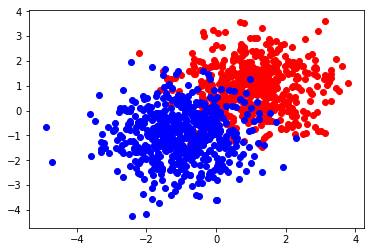

In [3]:
dataset_merge=pd.concat([dataset_test,dataset_train])
data0=dataset_merge[dataset_merge.iloc[:,2]==0]
data1=dataset_merge[dataset_merge.iloc[:,2]==1]
plt.scatter(data0[0],data0[1],color='red')
plt.scatter(data1[0],data1[1],color='blue')
plt.show()

In [4]:
knn=KNeighborsClassifier(n_neighbors=7)
digit_knn=knn.fit(dataset_train.iloc[:,0:2],dataset_train.iloc[:,2])

Ein=1-digit_knn.score(dataset_train.iloc[:,0:2],dataset_train.iloc[:,2])
Eout=1-digit_knn.score(dataset_test.iloc[:,0:2],dataset_test.iloc[:,2])

In [5]:
print(Ein, Eout)

0.050000000000000044 0.08299999999999996


In [6]:
sizes=np.arange(5,51,5)
Ein=np.arange(5.0,51,5)
Eout=np.arange(5.0,51,5)

random_order_0=np.arange(50)
np.random.shuffle(random_order_0)
random_order_1=np.arange(50,100,1)
np.random.shuffle(random_order_1)

counter=0
for j in sizes:
    indices=np.append(random_order_0[0:j],random_order_1[0:j])
    small_datatrain=dataset_train.iloc[indices,:]
    knn=KNeighborsClassifier(n_neighbors=7)
    digit_knn=knn.fit(small_datatrain.iloc[:,0:2],small_datatrain.iloc[:,2])
    
    Ein[counter]=1-digit_knn.score(small_datatrain.iloc[:,0:2],small_datatrain.iloc[:,2])
    Eout[counter]=1-digit_knn.score(dataset_test.iloc[:,0:2],dataset_test.iloc[:,2])
    counter+=1

print(Ein,Eout)

[0.1        0.1        0.03333333 0.075      0.1        0.06666667
 0.1        0.0875     0.06666667 0.05      ] [0.107 0.084 0.074 0.081 0.084 0.082 0.084 0.085 0.085 0.083]


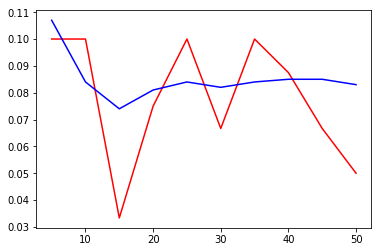

In [7]:
plt.plot(sizes,Ein,color='red')
plt.plot(sizes,Eout,color='blue')
plt.show()